In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
rdf=pd.read_csv('/content/drive/MyDrive/rain/rainfalldata.xls - rainfalldata.xls.csv')
tdf=pd.read_csv('/content/drive/MyDrive/rain/annualdatamean.csv')

In [ ]:
rdf.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JF,MAM,JJAS,OND,ANN
0,1871,19.6,10.7,14.5,33.9,63.6,208.0,277.8,179.4,183.6,36.8,32.4,6.7,30.3,112.0,848.7,75.8,1067.0
1,1872,7.6,7.5,7.3,24.0,43.8,189.2,291.3,245.2,187.9,78.5,27.6,19.1,15.1,75.1,913.6,125.2,1128.9
2,1873,3.7,13.5,15.0,24.3,42.8,113.0,264.5,214.2,165.6,60.7,11.5,9.0,17.2,82.1,757.3,81.2,937.8
3,1874,8.6,15.8,10.7,16.9,68.3,227.9,306.9,233.5,206.2,93.2,18.7,4.0,24.4,95.9,974.5,115.9,1210.6
4,1875,9.9,11.4,13.1,23.2,50.6,192.6,307.9,218.7,210.5,56.6,6.3,7.1,21.3,86.9,929.7,70.0,1107.8


In [ ]:
print(rdf.describe())

              YEAR         JAN         FEB         MAR         APR  \
count   146.000000  146.000000  146.000000  146.000000  146.000000   
mean   1943.500000   10.764384   12.445205   15.226712   26.439041   
std      42.290661    7.592199    8.848129    9.361700    9.130316   
min    1871.000000    0.800000    0.600000    2.600000    8.000000   
25%    1907.250000    4.925000    5.725000    9.425000   20.625000   
50%    1943.500000    9.150000   10.650000   12.700000   24.700000   
75%    1979.750000   15.275000   15.950000   18.350000   31.825000   
max    2016.000000   40.500000   41.000000   52.800000   60.500000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean    52.734247  163.057534  272.534932  242.234932  170.339726   77.530822   
std     15.984011   36.399086   37.480624   37.696806   36.716813   28.721681   
min     20.500000   81.500000  121.300000  14

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go

# Assuming your dataframe is ready as 'df'

# Features and target
X = rdf[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
        'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y = rdf['ANN']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Create interactive plot
fig = go.Figure()

# Add actual values
fig.add_trace(go.Scatter(
    x=list(range(len(y_test))),
    y=y_test,
    mode='markers+lines',
    name='Actual Rainfall'
))

# Add predicted values
fig.add_trace(go.Scatter(
    x=list(range(len(y_pred))),
    y=y_pred,
    mode='markers+lines',
    name='Predicted Rainfall'
))

# Update layout
fig.update_layout(
    title='Actual vs Predicted Annual Rainfall',
    xaxis_title='Sample Index',
    yaxis_title='Annual Rainfall (mm)',
    hovermode='closest',
    width=1000,
    height=600,
)

# Show plot
fig.show()


Mean Squared Error (MSE): 7397.090999999999
R² Score: -0.11588662815810924


In [ ]:
from sklearn.tree import export_text

# After fitting your model:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Extract tree structure in text form
tree_rules = export_text(regressor, feature_names=list(X.columns))

# Print the decision tree splits
print(tree_rules)


|--- SEP <= 179.60
|   |--- AUG <= 220.85
|   |   |--- OCT <= 69.20
|   |   |   |--- JUL <= 203.05
|   |   |   |   |--- AUG <= 182.30
|   |   |   |   |   |--- value: [810.90]
|   |   |   |   |--- AUG >  182.30
|   |   |   |   |   |--- value: [857.50]
|   |   |   |--- JUL >  203.05
|   |   |   |   |--- JUN <= 143.00
|   |   |   |   |   |--- OCT <= 41.30
|   |   |   |   |   |   |--- value: [871.90]
|   |   |   |   |   |--- OCT >  41.30
|   |   |   |   |   |   |--- DEC <= 5.75
|   |   |   |   |   |   |   |--- APR <= 19.65
|   |   |   |   |   |   |   |   |--- value: [914.10]
|   |   |   |   |   |   |   |--- APR >  19.65
|   |   |   |   |   |   |   |   |--- JUN <= 116.70
|   |   |   |   |   |   |   |   |   |--- value: [920.20]
|   |   |   |   |   |   |   |   |--- JUN >  116.70
|   |   |   |   |   |   |   |   |   |--- value: [921.30]
|   |   |   |   |   |   |--- DEC >  5.75
|   |   |   |   |   |   |   |--- MAR <= 18.05
|   |   |   |   |   |   |   |   |--- value: [937.80]
|   |   |   |   |   

In [ ]:
import numpy as np

# Get feature importances
feature_importances = regressor.feature_importances_

# Sort them
sorted_indices = np.argsort(feature_importances)[::-1]

print("\nFeature importance in sorted order:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")



Feature importance in sorted order:
SEP: 0.3350
AUG: 0.2490
MAY: 0.1156
JUL: 0.0979
OCT: 0.0842
JUN: 0.0452
FEB: 0.0310
NOV: 0.0232
APR: 0.0139
DEC: 0.0039
JAN: 0.0009
MAR: 0.0004



📈 Mean Squared Error (MSE): 1303.10
📈 R² Score: 0.8034

🧩 Decision Tree Structure:

|--- JJAS <= 846.15
|   |--- JJAS <= 779.10
|   |   |--- OND <= 76.65
|   |   |   |--- JJAS <= 712.85
|   |   |   |   |--- JJAS <= 639.90
|   |   |   |   |   |--- value: [810.90]
|   |   |   |   |--- JJAS >  639.90
|   |   |   |   |   |--- MAM <= 97.40
|   |   |   |   |   |   |--- value: [871.90]
|   |   |   |   |   |--- MAM >  97.40
|   |   |   |   |   |   |--- value: [857.50]
|   |   |   |--- JJAS >  712.85
|   |   |   |   |--- MAM <= 89.15
|   |   |   |   |   |--- value: [914.10]
|   |   |   |   |--- MAM >  89.15
|   |   |   |   |   |--- value: [920.20]
|   |   |--- OND >  76.65
|   |   |   |--- JJAS <= 723.55
|   |   |   |   |--- OND <= 118.10
|   |   |   |   |   |--- JF <= 27.55
|   |   |   |   |   |   |--- value: [856.10]
|   |   |   |   |   |--- JF >  27.55
|   |   |   |   |   |   |--- value: [921.30]
|   |   |   |   |--- OND >  118.10
|   |   |   |   |   |--- JF <= 12.95
|   |   |   |   |   |  

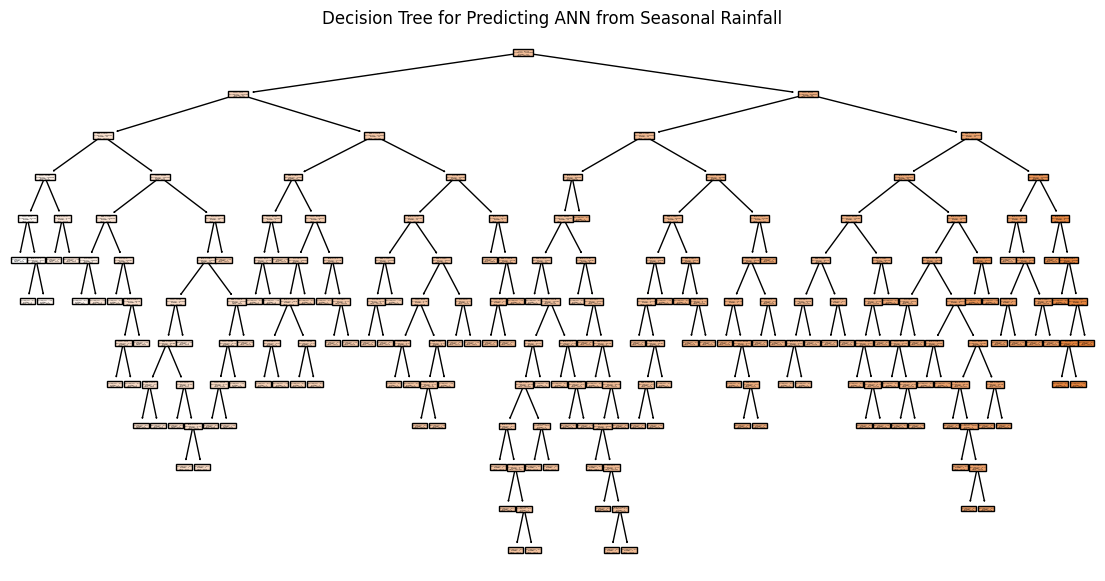


📋 Feature Importance (Sorted):
JJAS: 0.8243
OND: 0.1227
MAM: 0.0418
JF: 0.0112


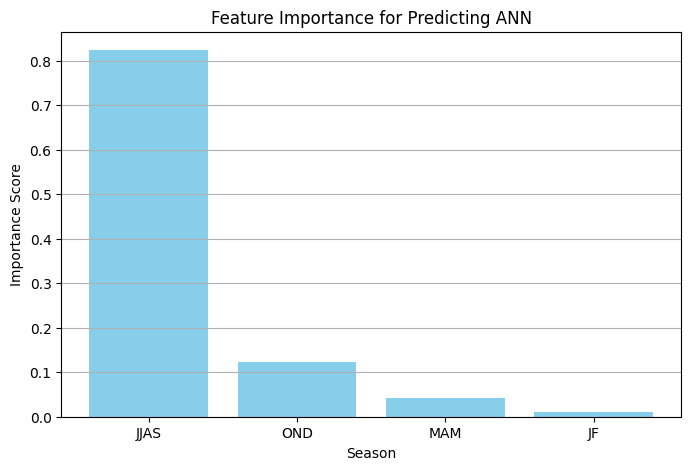

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is your DataFrame

# Features and Target
X = rdf[['JF', 'MAM', 'JJAS', 'OND']]
y = rdf['ANN']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📈 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

# Print Decision Tree Rules
tree_rules = export_text(regressor, feature_names=list(X.columns))
print("\n🧩 Decision Tree Structure:\n")
print(tree_rules)

# Plot the Decision Tree
plt.figure(figsize=(14,7))
tree.plot_tree(regressor, filled=True, feature_names=X.columns)
plt.title("Decision Tree for Predicting ANN from Seasonal Rainfall")
plt.show()

# Feature Importances
feature_importances = regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

print("\n📋 Feature Importance (Sorted):")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

# (Optional) Plot feature importance as bar chart
plt.figure(figsize=(8,5))
plt.bar(X.columns[sorted_indices], feature_importances[sorted_indices], color="skyblue")
plt.title("Feature Importance for Predicting ANN")
plt.xlabel("Season")
plt.ylabel("Importance Score")
plt.grid(axis='y')
plt.show()



📈 Mean Squared Error (MSE): 1717.89
📈 R² Score: 0.7408

🧩 Decision Tree Structure:

|--- JJAS <= 846.15
|   |--- JJAS <= 779.10
|   |   |--- OND <= 76.65
|   |   |   |--- JJAS <= 712.85
|   |   |   |   |--- APR <= 38.25
|   |   |   |   |   |--- MAY <= 61.30
|   |   |   |   |   |   |--- value: [871.90]
|   |   |   |   |   |--- MAY >  61.30
|   |   |   |   |   |   |--- value: [857.50]
|   |   |   |   |--- APR >  38.25
|   |   |   |   |   |--- value: [810.90]
|   |   |   |--- JJAS >  712.85
|   |   |   |   |--- MAR <= 22.30
|   |   |   |   |   |--- value: [914.10]
|   |   |   |   |--- MAR >  22.30
|   |   |   |   |   |--- value: [920.20]
|   |   |--- OND >  76.65
|   |   |   |--- JUL <= 137.35
|   |   |   |   |--- value: [856.10]
|   |   |   |--- JUL >  137.35
|   |   |   |   |--- JJAS <= 762.50
|   |   |   |   |   |--- JUL <= 260.45
|   |   |   |   |   |   |--- SEP <= 131.05
|   |   |   |   |   |   |   |--- OND <= 109.75
|   |   |   |   |   |   |   |   |--- OCT <= 59.70
|   |   |   |   

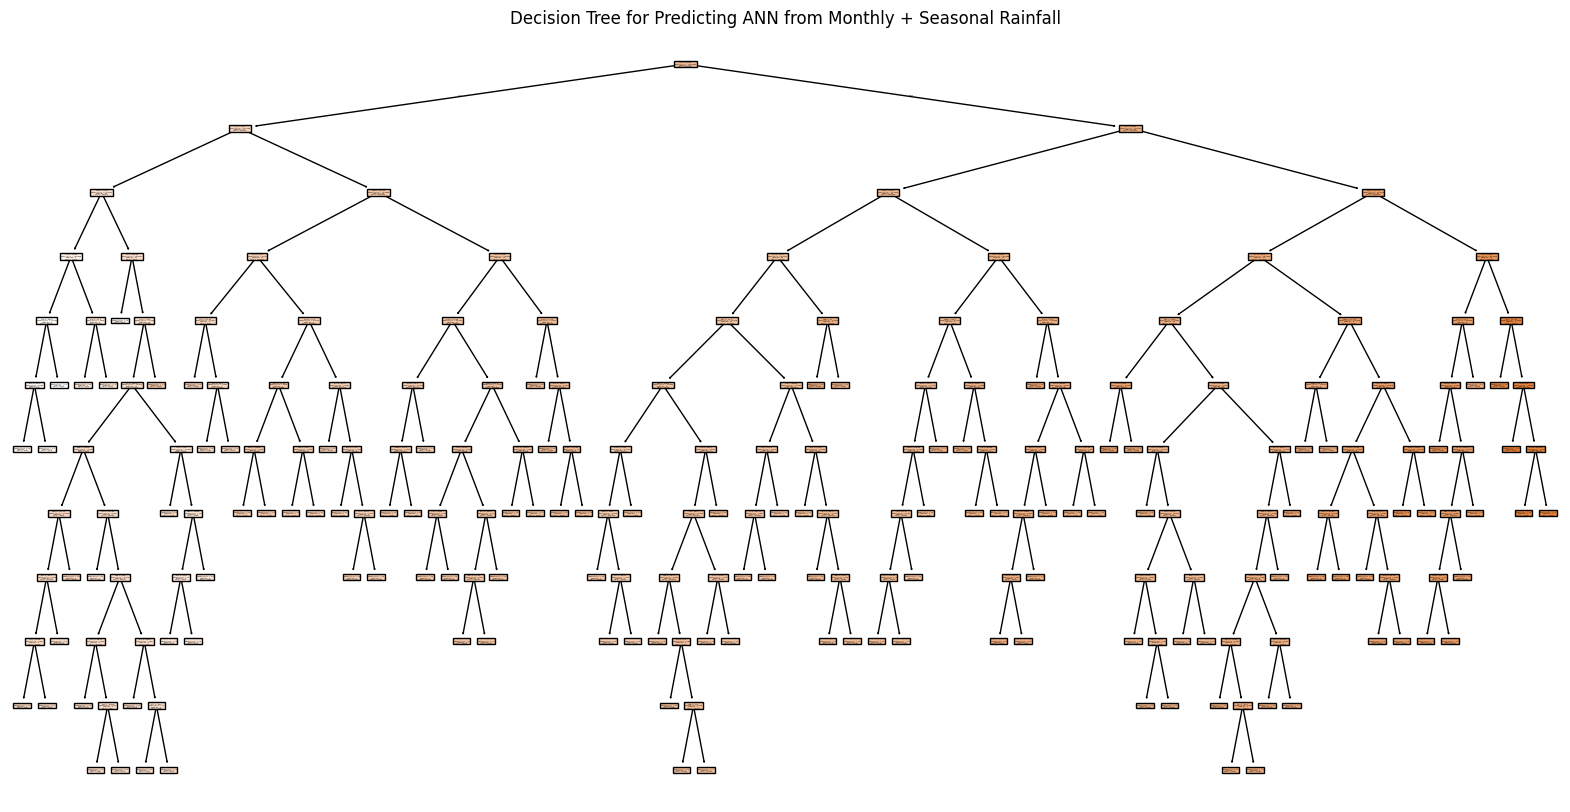


📋rdf Feature Importance (Sorted):
JJAS: 0.7960
OND: 0.1149
MAY: 0.0457
JUL: 0.0108
SEP: 0.0078
JAN: 0.0055
AUG: 0.0048
MAR: 0.0041
MAM: 0.0036
DEC: 0.0020
APR: 0.0016
OCT: 0.0012
JUN: 0.0009
FEB: 0.0005
NOV: 0.0003
JF: 0.0002


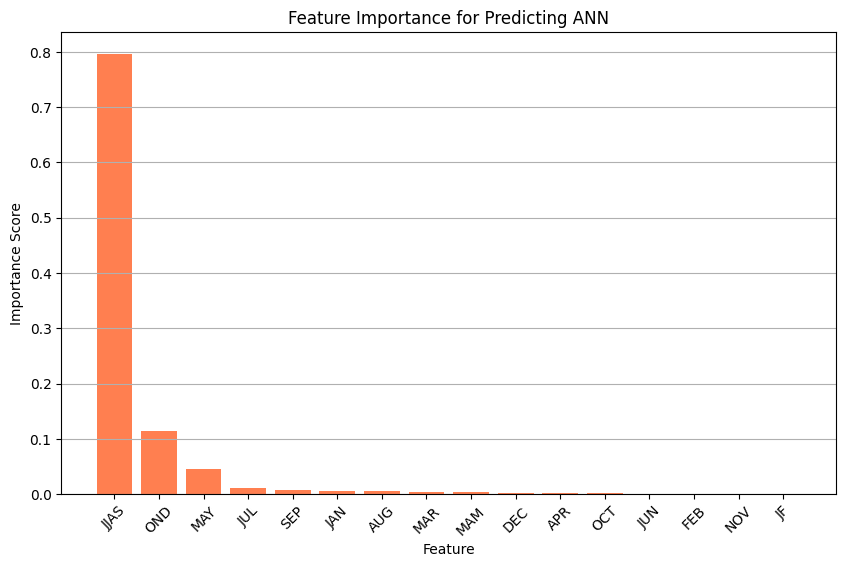

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is your DataFrame

# Features (JAN to DEC + JF, MAM, JJAS, OND)
X = rdf[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
        'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
        'JF', 'MAM', 'JJAS', 'OND']]

# Target
y = rdf['ANN']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Build Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📈 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

# Print Decision Tree Structure
tree_rules = export_text(regressor, feature_names=list(X.columns))
print("\n🧩 Decision Tree Structure:\n")
print(tree_rules)

# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True, feature_names=X.columns)
plt.title("Decision Tree for Predicting ANN from Monthly + Seasonal Rainfall")
plt.show()

# Feature Importances
feature_importances = regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

print("\n📋rdf Feature Importance (Sorted):")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

# Plot feature importance as bar chart
plt.figure(figsize=(10,6))
plt.bar(X.columns[sorted_indices], feature_importances[sorted_indices], color="coral")
plt.title("Feature Importance for Predicting ANN")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
tdf=pd.read_csv('/content/drive/MyDrive/rain/annualdatamean.csv')

In [ ]:
tdf.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,19.32,20.89,24.95,28.22,29.76,29.85,28.24,27.33,27.23,26.33,22.92,20.05,25.42,20.11,27.64,28.16,23.10
1,1902,20.17,21.58,25.73,28.15,30.00,29.47,27.99,27.71,26.76,25.33,22.43,19.77,25.42,20.88,27.96,27.98,22.51
2,1903,19.28,20.71,23.92,27.67,29.47,29.53,28.32,27.16,27.00,25.69,22.01,19.30,25.01,19.99,27.02,28.00,22.33
3,1904,19.19,20.32,24.41,28.11,29.17,28.80,27.36,27.26,26.84,25.67,22.16,19.86,24.93,19.76,27.23,27.57,22.56
4,1905,18.34,18.37,23.15,26.26,29.73,29.87,28.13,27.65,27.16,26.35,23.24,19.79,24.84,18.36,26.38,28.20,23.13


In [ ]:
tdf.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:

# Rename columns
tdf.rename(columns={
    'JAN-FEB': 'JF',
    'MAR-MAY': 'MAM',
    'JUN-SEP': 'JJAS',
    'OCT-DEC': 'OND',
    'ANNUAL':'ANN'
}, inplace=True)

tdf.columns
#1

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANN', 'JF', 'MAM', 'JJAS', 'OND'],
      dtype='object')


📈 Mean Squared Error (MSE): 0.03
📈 R² Score: 0.7437

🧩 Decision Tree Structure:

|--- OND <= 23.22
|   |--- JF <= 20.62
|   |   |--- JJAS <= 27.60
|   |   |   |--- JJAS <= 27.31
|   |   |   |   |--- value: [24.54]
|   |   |   |--- JJAS >  27.31
|   |   |   |   |--- JUN <= 28.42
|   |   |   |   |   |--- JUL <= 27.58
|   |   |   |   |   |   |--- MAR <= 24.97
|   |   |   |   |   |   |   |--- value: [25.11]
|   |   |   |   |   |   |--- MAR >  24.97
|   |   |   |   |   |   |   |--- value: [25.10]
|   |   |   |   |   |--- JUL >  27.58
|   |   |   |   |   |   |--- value: [25.08]
|   |   |   |   |--- JUN >  28.42
|   |   |   |   |   |--- MAY <= 29.62
|   |   |   |   |   |   |--- MAR <= 24.80
|   |   |   |   |   |   |   |--- JJAS <= 27.51
|   |   |   |   |   |   |   |   |--- value: [24.91]
|   |   |   |   |   |   |   |--- JJAS >  27.51
|   |   |   |   |   |   |   |   |--- JUL <= 27.45
|   |   |   |   |   |   |   |   |   |--- value: [24.93]
|   |   |   |   |   |   |   |   |--- JUL >  27.45
|   

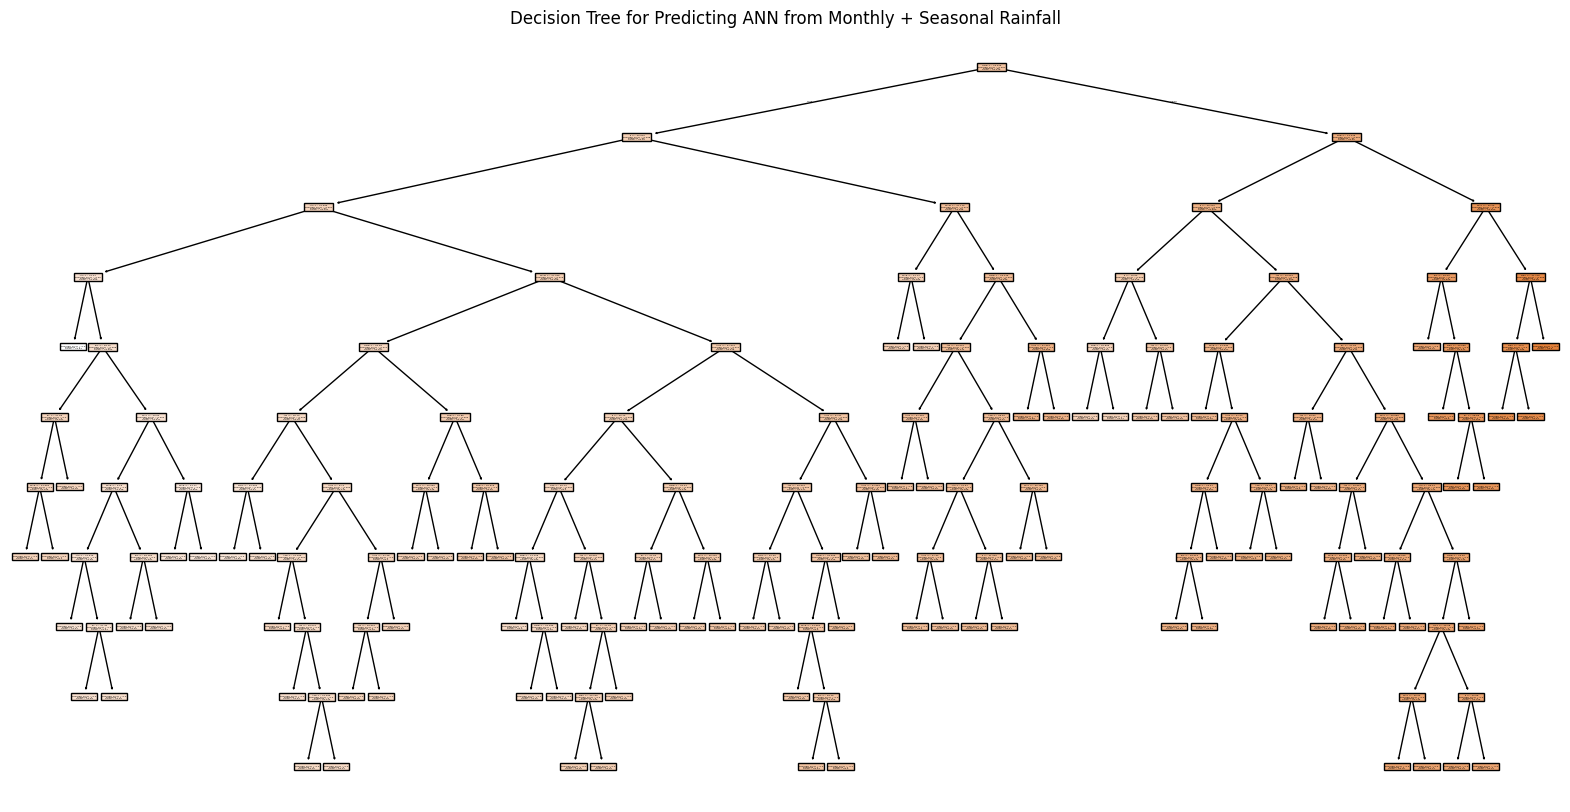


📋 tdf Feature Importance (Sorted):
OND: 0.5568
JF: 0.1665
FEB: 0.0965
JJAS: 0.0735
MAM: 0.0364
AUG: 0.0206
JAN: 0.0139
MAY: 0.0127
JUN: 0.0110
JUL: 0.0039
MAR: 0.0027
SEP: 0.0023
DEC: 0.0020
APR: 0.0007
NOV: 0.0006
OCT: 0.0000


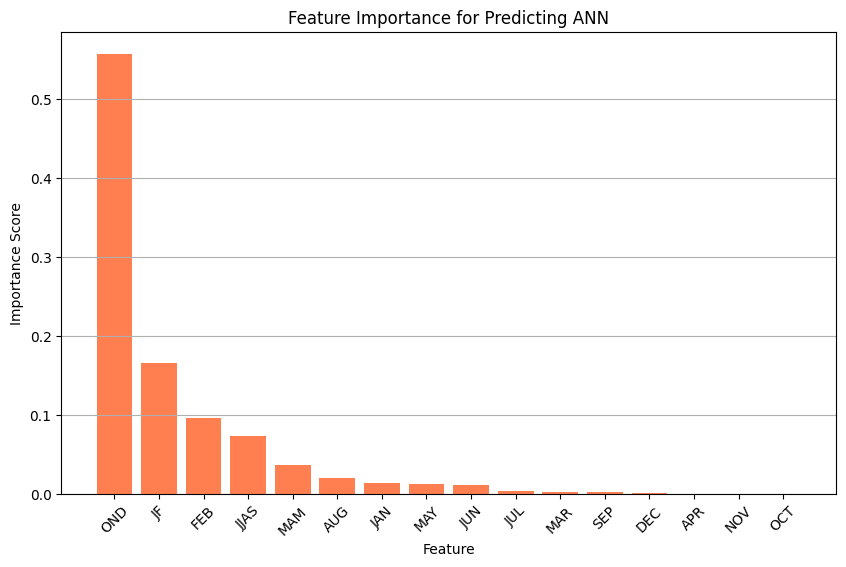

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming 'df' is your DataFrame

# Features (JAN to DEC + JF, MAM, JJAS, OND)
X = tdf[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
        'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
        'JF', 'MAM', 'JJAS', 'OND']]

# Target
y = tdf['ANN']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Build Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📈 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

# Print Decision Tree Structure
tree_rules = export_text(regressor, feature_names=list(X.columns))
print("\n🧩 Decision Tree Structure:\n")
print(tree_rules)

# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True, feature_names=X.columns)
plt.title("Decision Tree for Predicting ANN from Monthly + Seasonal Rainfall")
plt.show()

# Feature Importances
feature_importances = regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

print("\n📋 tdf Feature Importance (Sorted):")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

# Plot feature importance as bar chart
plt.figure(figsize=(10,6))
plt.bar(X.columns[sorted_indices], feature_importances[sorted_indices], color="coral")
plt.title("Feature Importance for Predicting ANN")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
tdf.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:
print(rdf.describe())


              YEAR         JAN         FEB         MAR         APR  \
count   146.000000  146.000000  146.000000  146.000000  146.000000   
mean   1943.500000   10.764384   12.445205   15.226712   26.439041   
std      42.290661    7.592199    8.848129    9.361700    9.130316   
min    1871.000000    0.800000    0.600000    2.600000    8.000000   
25%    1907.250000    4.925000    5.725000    9.425000   20.625000   
50%    1943.500000    9.150000   10.650000   12.700000   24.700000   
75%    1979.750000   15.275000   15.950000   18.350000   31.825000   
max    2016.000000   40.500000   41.000000   52.800000   60.500000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  146.000000  146.000000  146.000000  146.000000  146.000000  146.000000   
mean    52.734247  163.057534  272.534932  242.234932  170.339726   77.530822   
std     15.984011   36.399086   37.480624   37.696806   36.716813   28.721681   
min     20.500000   81.500000  121.300000  14

In [ ]:
print(tdf.describe())

              YEAR         JAN         FEB         MAR         APR  \
count   121.000000  121.000000  121.000000  121.000000  121.000000   
mean   1961.000000   19.471240   21.329339   24.803554   27.925372   
std      35.073732    0.492527    0.721850    0.695428    0.607111   
min    1901.000000   17.770000   18.370000   23.150000   26.260000   
25%    1931.000000   19.200000   20.890000   24.350000   27.490000   
50%    1961.000000   19.460000   21.290000   24.760000   27.990000   
75%    1991.000000   19.810000   21.830000   25.280000   28.350000   
max    2021.000000   20.690000   23.150000   26.670000   29.480000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count  121.000000  121.000000  121.000000  121.000000  121.000000  121.000000   
mean    29.706033   29.215702   27.849752   27.378843   27.109669   25.861570   
std      0.481908    0.493904    0.342935    0.305328    0.327312    0.446109   
min     27.730000   28.020000   26.930000   2

Feature-wise Correlation between tdf (Temperature) and rdf (Rainfall):
   Feature  Correlation
0     YEAR     1.000000
15    JJAS    -0.180121
9      SEP    -0.145305
17     ANN    -0.122926
7      JUL    -0.107711
10     OCT    -0.102009
14     MAM    -0.082303
5      MAY    -0.065225
13      JF    -0.064175
8      AUG     0.053142
4      APR    -0.050614
6      JUN    -0.039924
2      FEB    -0.028100
1      JAN    -0.019921
16     OND    -0.013126
3      MAR    -0.012185
11     NOV    -0.010173
12     DEC     0.004018


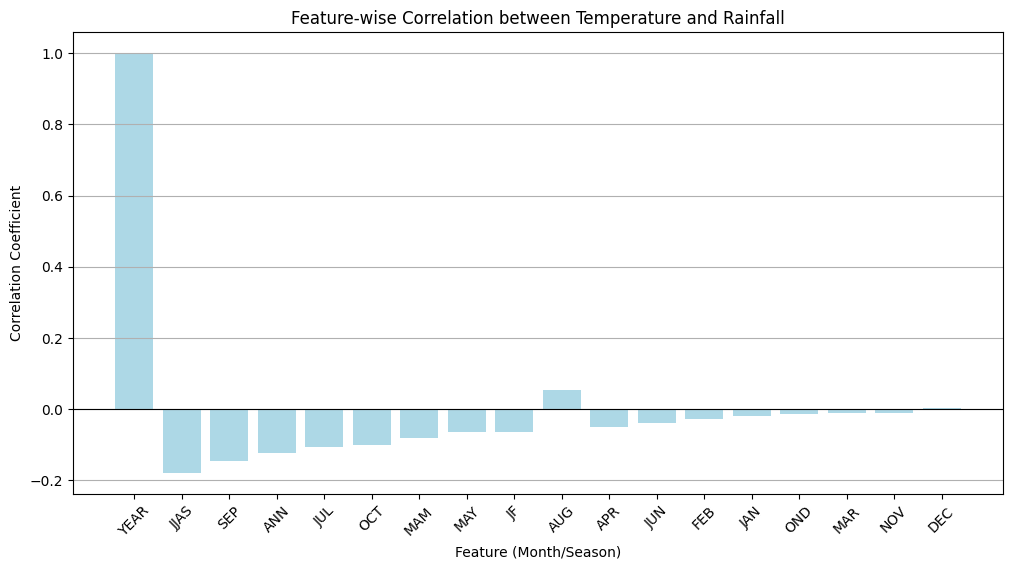

In [ ]:
import pandas as pd

# Assuming tdf and rdf are your two dataframes with similar column structure

# Initialize an empty dictionary to store correlations
correlation_dict = {}

# Loop over columns (ensure columns are same in both dataframes)
for col in tdf.columns:
    if col in rdf.columns:  # Ensure column exists in both tdf and rdf
        corr = tdf[col].corr(rdf[col])
        correlation_dict[col] = corr

# Convert the dictionary into a DataFrame for better readability
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlation'])

# Sort by absolute correlation value (to get strongest correlations)
correlation_df['AbsCorrelation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='AbsCorrelation', ascending=False).drop(columns=['AbsCorrelation'])

# Display the correlation DataFrame
print("Feature-wise Correlation between tdf (Temperature) and rdf (Rainfall):")
print(correlation_df)

# (Optional) Plot bar graph to visualize the correlations
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(correlation_df['Feature'], correlation_df['Correlation'], color="lightblue")
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Feature-wise Correlation between Temperature and Rainfall")
plt.xlabel("Feature (Month/Season)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
tdf.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANN', 'JF', 'MAM', 'JJAS', 'OND'],
      dtype='object')

In [ ]:
rdf.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'JF', 'MAM', 'JJAS', 'OND', 'ANN'],
      dtype='object')

In [ ]:
tdf.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,JF,MAM,JJAS,OND
0,1901,19.32,20.89,24.95,28.22,29.76,29.85,28.24,27.33,27.23,26.33,22.92,20.05,25.42,20.11,27.64,28.16,23.10
1,1902,20.17,21.58,25.73,28.15,30.00,29.47,27.99,27.71,26.76,25.33,22.43,19.77,25.42,20.88,27.96,27.98,22.51
2,1903,19.28,20.71,23.92,27.67,29.47,29.53,28.32,27.16,27.00,25.69,22.01,19.30,25.01,19.99,27.02,28.00,22.33
3,1904,19.19,20.32,24.41,28.11,29.17,28.80,27.36,27.26,26.84,25.67,22.16,19.86,24.93,19.76,27.23,27.57,22.56
4,1905,18.34,18.37,23.15,26.26,29.73,29.87,28.13,27.65,27.16,26.35,23.24,19.79,24.84,18.36,26.38,28.20,23.13


In [ ]:
cols = [col for col in tdf.columns if col != 'ANN']
cols.append('ANN')
tdf = tdf[cols]
#2

In [ ]:
print(tdf.columns)
print(rdf.columns)

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'JF', 'MAM', 'JJAS', 'OND', 'ANN'],
      dtype='object')
Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'JF', 'MAM', 'JJAS', 'OND', 'ANN'],
      dtype='object')


In [ ]:
rdf.shape


(146, 18)

In [ ]:
tdf.shape

(121, 18)

In [ ]:
rdf_reset = rdf.reset_index(drop=True)

In [ ]:
rdf.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JF,MAM,JJAS,OND,ANN
0,1871,19.6,10.7,14.5,33.9,63.6,208.0,277.8,179.4,183.6,36.8,32.4,6.7,30.3,112.0,848.7,75.8,1067.0
1,1872,7.6,7.5,7.3,24.0,43.8,189.2,291.3,245.2,187.9,78.5,27.6,19.1,15.1,75.1,913.6,125.2,1128.9
2,1873,3.7,13.5,15.0,24.3,42.8,113.0,264.5,214.2,165.6,60.7,11.5,9.0,17.2,82.1,757.3,81.2,937.8
3,1874,8.6,15.8,10.7,16.9,68.3,227.9,306.9,233.5,206.2,93.2,18.7,4.0,24.4,95.9,974.5,115.9,1210.6
4,1875,9.9,11.4,13.1,23.2,50.6,192.6,307.9,218.7,210.5,56.6,6.3,7.1,21.3,86.9,929.7,70.0,1107.8


In [ ]:


import pandas as pd
f_tdf = tdf[(tdf['YEAR'] >= 1901) & (tdf['YEAR'] <= 2016)]
f_rdf = rdf[(rdf['YEAR'] >= 1901) & (rdf['YEAR'] <= 2016)]

# Merge the two dataframes based on the 'YEAR' column
merged_df = pd.merge(f_tdf, f_rdf, on='YEAR', how='inner')

# Now merged_df contains data from both tdf and rdf for the specified years.
merged_df.head()


,YEAR,JAN_x,FEB_x,MAR_x,APR_x,MAY_x,JUN_x,JUL_x,AUG_x,SEP_x,...,AUG_y,SEP_y,OCT_y,NOV_y,DEC_y,JF_y,MAM_y,JJAS_y,OND_y,ANN_y
0,1901,19.32,20.89,24.95,28.22,29.76,29.85,28.24,27.33,27.23,...,259.0,125.6,54.0,43.1,9.5,61.1,82.0,722.0,106.6,971.7
1,1902,20.17,21.58,25.73,28.15,30.00,29.47,27.99,27.71,26.76,...,197.2,211.2,69.7,27.8,26.9,9.2,87.4,791.8,124.4,1012.8
2,1903,19.28,20.71,23.92,27.67,29.47,29.53,28.32,27.16,27.00,...,259.3,195.7,128.8,43.4,15.2,14.0,78.5,860.8,187.4,1140.7
3,1904,19.19,20.32,24.41,28.11,29.17,28.80,27.36,27.26,26.84,...,197.0,126.2,70.7,9.0,9.9,14.5,120.0,750.3,89.6,974.4
4,1905,18.34,18.37,23.15,26.26,29.73,29.87,28.13,27.65,27.16,...,205.2,174.8,61.0,9.8,2.5,27.2,103.3,716.4,73.3,920.2


In [ ]:
print('rdf')
print(rdf.columns)
print('tdf')
print(tdf.columns)

rdf
Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'JF', 'MAM', 'JJAS', 'OND', 'ANN'],
      dtype='object')
tdf
Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')


In [ ]:
print('ftdf_head')
print(f_tdf.head())
print('frdf_head')
print(f_rdf.head())

ftdf_head
   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  19.32  20.89  24.95  28.22  29.76  29.85  28.24  27.33  27.23  26.33   
1  1902  20.17  21.58  25.73  28.15  30.00  29.47  27.99  27.71  26.76  25.33   
2  1903  19.28  20.71  23.92  27.67  29.47  29.53  28.32  27.16  27.00  25.69   
3  1904  19.19  20.32  24.41  28.11  29.17  28.80  27.36  27.26  26.84  25.67   
4  1905  18.34  18.37  23.15  26.26  29.73  29.87  28.13  27.65  27.16  26.35   

     NOV    DEC     JF    MAM   JJAS    OND    ANN  
0  22.92  20.05  20.11  27.64  28.16  23.10  25.42  
1  22.43  19.77  20.88  27.96  27.98  22.51  25.42  
2  22.01  19.30  19.99  27.02  28.00  22.33  25.01  
3  22.16  19.86  19.76  27.23  27.57  22.56  24.93  
4  23.24  19.79  18.36  26.38  28.20  23.13  24.84  
frdf_head
    YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
30  1931  20.38  21.01  24.60  28.70  29.85  29.86  27.68  27.67  26.94   
31  1932  20.03  20.62  2

In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate

# 📂 Load datasets
rdf = pd.read_csv('/content/drive/MyDrive/rain/rainfalldata.xls - rainfalldata.xls.csv')
tdf = pd.read_csv('/content/drive/MyDrive/rain/annualdatamean.csv')

# 🛠️ Rename columns to match
tdf.rename(columns={
    'ANNUAL': 'ANN',
    'JAN-FEB': 'JF',
    'MAR-MAY': 'MAM',
    'JUN-SEP': 'JJAS',
    'OCT-DEC': 'OND'
}, inplace=True)

# ✅ Select top important features
# From rdf
rdf_features = ['YEAR', 'JJAS', 'OND', 'MAY', 'JUL', 'SEP', 'JAN', 'AUG', 'MAR', 'MAM']

# From tdf
tdf_features = ['YEAR', 'OND', 'JF', 'FEB', 'JJAS', 'MAM', 'AUG', 'JAN', 'MAY', 'JUN']

# 📚 Keep only the selected columns
rdf = rdf[rdf_features + ['ANN']]
tdf = tdf[tdf_features]

# 🤝 Merge datasets on YEAR (inner join)
merged = pd.merge(tdf, rdf, on='YEAR', how='inner')

print("Merged dataset shape:", merged.shape)
print(merged.head())

# 🧹 Prepare input (X) and output (y)
X = merged.drop(columns=['YEAR', 'ANN'])
y = merged['ANN']

# 🌳 Build Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# 🔟 10-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring
scoring = {
    'r2': 'r2',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error'
}

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring)

# 📈 Report metrics
r2 = np.mean(cv_results['test_r2'])
rmse = np.mean(np.sqrt(-cv_results['test_neg_mean_squared_error']))
mae = np.mean(-cv_results['test_neg_mean_absolute_error'])

print("\n📊 Model Performance (10-Fold CV):")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Merged dataset shape: (116, 20)
   YEAR  OND_x     JF    FEB  JJAS_x  MAM_x  AUG_x  JAN_x  MAY_x    JUN  \
0  1901  23.10  20.11  20.89   28.16  27.64  27.33  19.32  29.76  29.85   
1  1902  22.51  20.88  21.58   27.98  27.96  27.71  20.17  30.00  29.47   
2  1903  22.33  19.99  20.71   28.00  27.02  27.16  19.28  29.47  29.53   
3  1904  22.56  19.76  20.32   27.57  27.23  27.26  19.19  29.17  28.80   
4  1905  23.13  18.36  18.37   28.20  26.38  27.65  18.34  29.73  29.87   

   JJAS_y  OND_y  MAY_y    JUL    SEP  JAN_y  AUG_y   MAR  MAM_y     ANN  
0   722.0  106.6   39.1  222.5  125.6   27.4  259.0  11.3   82.0   971.7  
1   791.8  124.4   41.8  279.6  211.2    6.7  197.2  10.2   87.4  1012.8  
2   860.8  187.4   56.2  278.9  195.7    8.5  259.3  10.2   78.5  1140.7  
3   750.3   89.6   68.6  247.6  126.2    5.9  197.0  20.3  120.0   974.4  
4   716.4   73.3   47.6  245.6  174.8   12.8  205.2  28.6  103.3   920.2  

📊 Model Performance (10-Fold CV):
R² Score: 0.7912
RMSE: 40.8515
M